<a href="https://colab.research.google.com/github/anhhao04/NguyenAnhHao-20104006.github.io/blob/main/Khu%C3%B4n_m%E1%BA%B7t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Face

/content/drive/MyDrive/Colab Notebooks/Face


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Face/Train',target_size=(600,400), batch_size=32, class_mode='categorical')

Found 170 images belonging to 3 classes.


In [5]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Face/Validation',target_size=(600,400), batch_size=32, class_mode='categorical')

Found 90 images belonging to 3 classes.


In [6]:
x_train.class_indices

{'Anh Hào': 0, 'Khánh Lâm': 1, 'Trương Quốc Hậu': 2}

In [7]:
validation.class_indices

{'Anh Hào': 0, 'Khánh Lâm': 1, 'Trương Quốc Hậu': 2}

In [8]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(600,400,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 600, 400, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 600, 400, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 300, 200, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 300, 200, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 300, 200, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 150, 100, 64)     0         
 2D)                                                    

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,epochs=10,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
6/6 [==============================] - 217s 37s/step - loss: 3.6530 - accuracy: 0.7941 - val_loss: 0.0283 - val_accuracy: 0.9889
Epoch 2/10
6/6 [==============================] - 214s 36s/step - loss: 0.1229 - accuracy: 0.9647 - val_loss: 3.1392e-07 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 206s 34s/step - loss: 0.0413 - accuracy: 0.9882 - val_loss: 9.3776e-07 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 205s 34s/step - loss: 4.1578e-05 - accuracy: 1.0000 - val_loss: 6.2487e-06 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 201s 38s/step - loss: 6.6613e-05 - accuracy: 1.0000 - val_loss: 5.7302e-05 - val_accuracy: 1.0000


In [11]:
Score=model.evaluate(x_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 9.74646354734432e-06
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

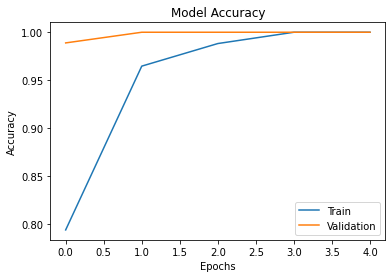

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [13]:
model.save("Khuôn mặt.h5")

In [14]:
model_CNN=load_model('Khuôn mặt.h5')

In [15]:
test="/content/drive/MyDrive/Colab Notebooks/Face/Test"

1/1 [==============================] - 0s 369ms/step
Đây là Trương Quốc Hậu


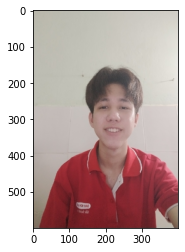

1/1 [==============================] - 0s 294ms/step
Đây là Trương Quốc Hậu


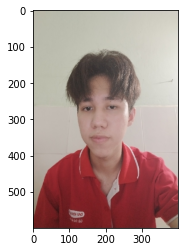

1/1 [==============================] - 0s 296ms/step
Đây là Anh Hào


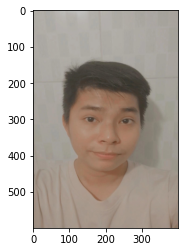

1/1 [==============================] - 0s 289ms/step
Đây là Anh Hào


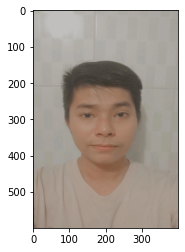

1/1 [==============================] - 0s 287ms/step
Đây là Khánh Lâm


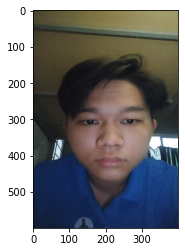

1/1 [==============================] - 0s 284ms/step
Đây là Khánh Lâm


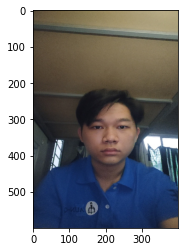

In [17]:
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(600,400))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Đây là Anh Hào'
  if round(result[0][1])==1:
    prediction='Đây là Khánh Lâm'
  if round(result[0][2])==1:
    prediction='Đây là Trương Quốc Hậu'
  print(prediction)
  plt.show()